# Spotify Music Taste Analysis Project 

This was project I did to further my understanding of 3 machine learning classifcation algorithms (KNN, Logitsic Regression, Support Vector Machines) that I learnt from [this udemy course](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) It's been a great experience so far and I definetly recommend it!

The aim of this project was to see which algorithm was able to classify my two friend's music the most accurately.  
I used various libraries (see below) and also learnt a lot about Spotify's API that I was required to use to gather data.  

This notebook will contain an introduction to each algorithm, the maths behind them, and a comparison between each algorithm used. Understanding the maths will not require extensive mathematical knowledge - I intend for it to be as accessible as possible for everyone! I will also include links for people who want to explore the mathematics even further.  

I hope you enjoy reading through this as much as I enjoyed making it! I'm also willing to hear any suggestions of improvements to my project/things I could explore in the future. Enjoy!

In [1]:
%run config.ipynb
import spotipy
import spotipy.util as util
import json
import import_ipynb
import config 
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import pprint as pp

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

importing Jupyter notebook from config.ipynb


## Accessing Spotify Data & Creating the Dataset 


I used the Spotipy library to access the spotify data and created a script to gather a playlist from my friend's account.  
I then created a dataframe with all the necessary information I needed from each song in the playlist. 

In [168]:
def get_user_playlist(username, playlist_id, sp):
    offset=0
    playlist_songs = sp.user_playlist_tracks(username, playlist_id, limit=100, fields=None, offset=offset, market=None)['items']
    #print(playlist_songs[0].keys())
    #print(type(playlist_songs))
    #returns a list of dictionary objects
    return playlist_songs

    return tracks


def create_dataframe(playlist_songs):
    
    playlist_df = pd.DataFrame()
    
    
    
    playlist_df['artist'] = np.array([song['track']["album"]["artists"][0]["name"] for song in playlist_songs])
    playlist_df['artist_id'] = np.array([song['track']['album']['artists'][0]['uri'] for song in playlist_songs])
    playlist_df['track_name'] = np.array([song['track']['name'] for song in playlist_songs])
    playlist_df['id'] = np.array([song['track']['id'] for song in playlist_songs])
    playlist_df['username'] = np.array([song['added_by']['id'] for song in playlist_songs])
    playlist_df['explicit'] = np.array([song['track']['explicit'] for song in playlist_songs])
    playlist_df['duration'] = np.array([song['track']['duration_ms'] for song in playlist_songs])
    
    
    audio_analysis = sp.audio_features(playlist_df['id'])    
    
    playlist_df['danceability'] = np.array([audio_info['danceability'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['tempo'] = np.array([audio_info['tempo'] for audio_info in audio_analysis])
    playlist_df['acousticness'] = np.array([audio_info['acousticness'] for audio_info in audio_analysis])
    playlist_df['energy'] = np.array([audio_info['energy'] for audio_info in audio_analysis])
    playlist_df['valence'] = np.array([audio_info['valence'] for audio_info in audio_analysis])

    return playlist_df



In [173]:
maya = '1158424416'  

m_playlist = get_user_playlist(maya, 'spotify:playlist:1jEd91bSorc9g4ZdCa6tMG',sp) #400
m_df = create_dataframe(m_playlist)
e_playlist = get_user_playlist('lizzy_real','spotify:playlist:5f6r5dtGWyCqVnwugk83zA', sp) #400
e_df = create_dataframe(e_playlist)
#display(e_df)


merged_df = e_df.append(m_df)

#for info in m_playlist:
    #print(info['track']["album"]["artists"][0]["name"])


#pp.pprint(m_playlist[358])


In [174]:
display(merged_df)


,artist,artist_id,track_name,id,username,explicit,duration,danceability,loudness,tempo,acousticness,energy,valence
0,Lil Baby,spotify:artist:5f7VJjfbwm532GiveGC0ZK,Trap Star,3iWt7if5iOXxBVsZdYZcGT,lizzy_real,True,203480,0.638,-9.613,146.038,0.06440,0.426,0.0797
1,Gunna,spotify:artist:2hlmm7s2ICUX0LVIhVFlZQ,Mind On A Milli (feat. Hoodrich Pablo Juan),5Z8RmbBjnmaF0iKWgyp27N,lizzy_real,True,183650,0.875,-8.182,115.000,0.47800,0.540,0.2470
2,Chief Keef,spotify:artist:15iVAtD3s3FsQR4w1v6M0P,Faneto,6l4qV9VNeCOesvcLPJMO9y,lizzy_real,True,206654,0.849,-7.399,144.186,0.34600,0.755,0.3930
3,YNW Melly,spotify:artist:1cNDP5yjU5vjeR8qMf4grg,Florida Water (Feat. J Green),6RmnCtZRg5fLOTWhUk8aIp,lizzy_real,True,214179,0.763,-7.934,134.943,0.50300,0.461,0.5870
4,Gunna,spotify:artist:2hlmm7s2ICUX0LVIhVFlZQ,Sold Out Dates (feat. Lil Baby),72LlwJM24dWKpFLVB3PWWQ,lizzy_real,True,166297,0.824,-7.118,127.003,0.43300,0.554,0.3160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Cocteau Twins,spotify:artist:5Wabl1lPdNOeIn0SQ5A1mp,Cherry-coloured Funk,6sVQNUvcVFTXvlk3ec0ngd,1158424416,False,192466,0.377,-5.902,180.074,0.00174,0.650,0.3650
96,Current Joys,spotify:artist:0m5FakHKCQdA7UN0PIzMcL,Kids,6ixkZ2Q9gQeh52C6GxbETg,1158424416,False,269142,0.827,-9.669,113.449,0.50800,0.660,0.9040
97,Jimi Hendrix,spotify:artist:776Uo845nYHJpNaStv1Ds4,Purple Haze,0wJoRiX5K5BxlqZTolB2LD,1158424416,False,170813,0.533,-5.270,108.900,0.00876,0.905,0.4860
98,The Velvet Underground,spotify:artist:1nJvji2KIlWSseXRSlNYsC,Sweet Jane - Full Length Version; 2015 Remaster,3cw3Z7mS55gd3NUjh4k0bL,1158424416,False,246306,0.619,-7.369,105.205,0.01500,0.637,0.9360


## Visualising the Data

I used a seaborn pairplot to compare the data from each playlist.  
My aim was to judge if there was a significant difference in the data of each playlist. I used the distrubution curves on the diagonal to determine this.

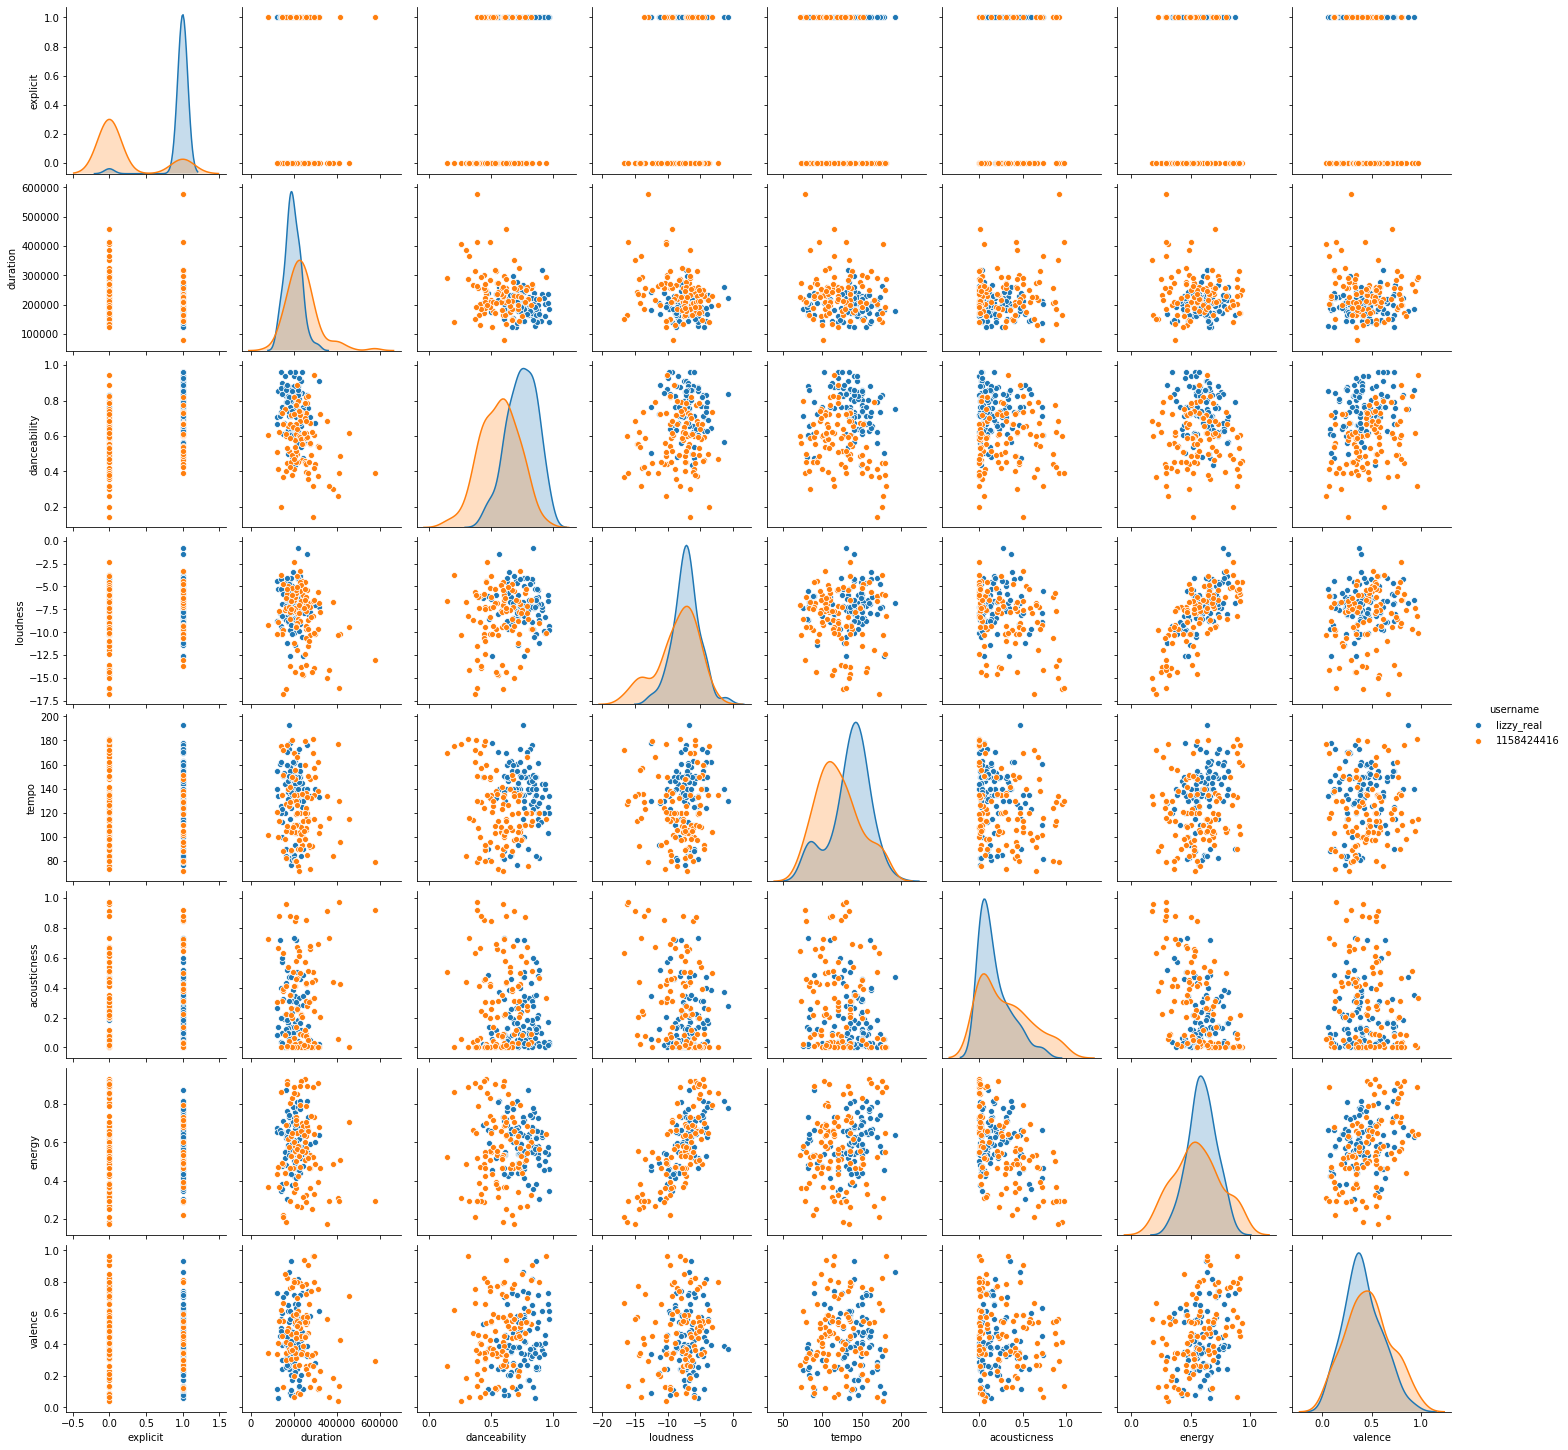

In [5]:
## doing a pairplot to see if there's a noticiable difference in their music
music_pairplot = sns.pairplot(merged_df, hue='username')
music_pairplot

# Implementing Algorithms

### First Step : Standardising Data

- why do we need to standardise? (what algorithms use it)
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

##### Why do we standardise?
Standardising is making variables have the same scale. This is essential for KNN as it 

relies on distance for classification. When you plot an object in the space, it's position is determined by the units of measurement you use in the data. For example, in my data before standardising, the 'Duration' column has data with a mean of 218957, which represents the length of the song in miliseconds. Now compare that to valence and energy who have mean values of 0.578350 and 0.441434 respectively. 
There's obviously a massive difference in the size of these variables! This means that the 'Duration' column has a much larger weight than other values. The algorithm will be biased towards classifying music based on the duration of a song rather than (roughly) equally between all the variables - the distance between each song in the space will mostly be determined by its duration.

This is wehre standardsing comes in. By standardising, we make all the variables have the same scale which redcues the issue of certain variables having a much larger weight. This is calculated by finding the mean and standrd deviation of each variable and then for each object subtracting the mean and dividing by the standard deviation of a variable: 

*pic of the formula*

In [6]:
## implement the knn algorithm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
# fit the dataset but remove non-numerical values and the target classes.
scaler.fit(merged_df.drop(['username','artist','artist_id','explicit','track_name','id'], axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(merged_df.drop(['username','artist','artist_id','explicit','track_name','id'], axis=1))

In [9]:
scaled_features

array([[-0.25023434, -0.12587087, -0.65410303, ..., -0.70661119,
        -0.94799399, -1.73971043],
       [-0.57084333,  1.31421579, -0.13350545, ...,  0.95131571,
        -0.2386319 , -0.93510385],
       [-0.1989175 ,  1.1562316 ,  0.15134983, ...,  0.4221901 ,
         1.09920012, -0.23293673],
       ...,
       [-0.77839035, -0.76388394,  0.9258797 , ..., -0.92964565,
         2.03257129,  0.21433411],
       [ 0.44217112, -0.24132085,  0.16226383, ..., -0.90463244,
         0.36494813,  2.37854785],
       [ 1.24797807,  1.7213289 , -0.84946355, ...,  0.36206219,
         0.38983803,  2.52282876]])

In [17]:
df_features = pd.DataFrame(scaled_features, columns=merged_df.columns[6:])
df_features.head()

,duration,danceability,loudness,tempo,acousticness,energy,valence
0,-0.250234,-0.125871,-0.654103,0.653927,-0.706611,-0.947994,-1.739710
1,-0.570843,1.314216,-0.133505,-0.489885,0.951316,-0.238632,-0.935104
2,-0.198918,1.156232,0.151350,0.585677,0.422190,1.099200,-0.232937
3,-0.077254,0.633669,-0.043283,0.245054,1.051529,-0.730207,0.700080
4,-0.851404,1.004324,0.253578,-0.047551,0.770932,-0.151517,-0.603258


In [15]:
# the unscaled dataframe
df_unscaled = pd.DataFrame(merged_df, columns=merged_df.columns[6:])
df_unscaled.describe()

,duration,danceability,loudness,tempo,acousticness,energy,valence
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,218957.255000,0.658715,-7.815025,128.293315,0.240677,0.578350,0.441434
std,62006.252663,0.164986,2.755662,27.203681,0.250094,0.161111,0.208449
min,80000.000000,0.143000,-16.734000,71.912000,0.000201,0.172000,0.039200
25%,182103.250000,0.552000,-9.202250,107.693500,0.028250,0.477250,0.302750
50%,209203.500000,0.669000,-7.358000,132.152000,0.142000,0.577500,0.413500
75%,242947.250000,0.784500,-6.159250,149.942000,0.400000,0.679500,0.566750
max,576346.000000,0.963000,-0.804000,192.957000,0.974000,0.931000,0.966000


# Implementing Algorithms

## 1. KNN (K Nearest Neighb)

##### What is it?
Knn is a classification algorithm that predicts the class (where class is the owner of the song) of an object (an indiviual song) by the most common class of K (which represents a number) of already classified objects (songs) that are nearest to it in a space.  

In [ ]:
## now I will train the model.

from sklearn.model_selection import train_test_split

X = df_features
y = merged_df['username']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
## fit the model with the training data
knn.fit(X_train, y_train)

## predict results with the test data, see if it's accurate using confusion matrix and classifcation reports!
pred = knn.predict(X_test)
pred

array(['1158424416', '1158424416', 'lizzy_real', '1158424416',
       'lizzy_real', 'lizzy_real', 'lizzy_real', 'lizzy_real',
       '1158424416', 'lizzy_real', '1158424416', '1158424416',
       '1158424416', 'lizzy_real', '1158424416', '1158424416',
       'lizzy_real', '1158424416', '1158424416', 'lizzy_real',
       '1158424416', '1158424416', '1158424416', 'lizzy_real',
       '1158424416', 'lizzy_real', 'lizzy_real', '1158424416',
       '1158424416', 'lizzy_real', '1158424416', '1158424416',
       'lizzy_real', 'lizzy_real', 'lizzy_real', 'lizzy_real',
       '1158424416', '1158424416', 'lizzy_real', '1158424416',
       'lizzy_real', '1158424416', '1158424416', 'lizzy_real',
       'lizzy_real', 'lizzy_real', '1158424416', 'lizzy_real',
       'lizzy_real', 'lizzy_real', 'lizzy_real', 'lizzy_real',
       '1158424416', 'lizzy_real', '1158424416', '1158424416',
       'lizzy_real', '1158424416', 'lizzy_real', 'lizzy_real'],
      dtype=object)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

### classification and confusion matrix - what are they?

I used 2 methods for evaluating the performance of each algorithm. One was a CLassification matrix - it compares the true condition against the predicted condition. The rows in the matrix represent the predicted values for the model, whereas the columns represent the actual values. [This microsoft article](https://docs.microsoft.com/en-us/analysis-services/data-mining/classification-matrix-analysis-services-data-mining?view=asallproducts-allversions#:~:text=The%20classification%20matrix%20is%20a,to%20as%20a%20confusion%20matrix.&text=A%20classification%20matrix%20is%20an,the%20effects%20of%20wrong%20predictions.) goes into more detail if you're interested.

In [15]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# precision -> shows proportion of data points the model SAYS WAS relevant (samples that should bve identiied as positive)
               # against ACTUAL relvant results
    
# recall -> no. correct positves / no. relevant samples

[[22  5]
 [ 7 26]]
              precision    recall  f1-score   support

  1158424416       0.76      0.81      0.79        27
  lizzy_real       0.84      0.79      0.81        33

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [16]:

#ELBOW METHOD - finding optimal k-value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

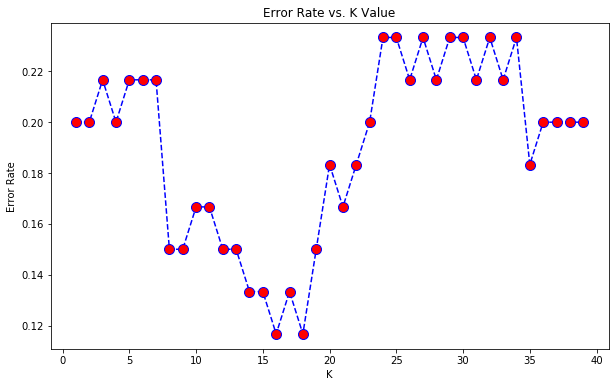

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

optimal K value = 17

In [18]:
## comparing k-values!
knn = KNeighborsClassifier(n_neighbors=1)
## fit the model with the training data
knn.fit(X_train, y_train)

## predict results with the test data, see if it's accurate using confusion matrix and classifcation reports!
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[22  5]
 [ 7 26]]


              precision    recall  f1-score   support

  1158424416       0.76      0.81      0.79        27
  lizzy_real       0.84      0.79      0.81        33

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [19]:
knn = KNeighborsClassifier(n_neighbors=17)
## fit the model with the training data
knn.fit(X_train, y_train)

## predict results with the test data, see if it's accurate using confusion matrix and classifcation reports!
pred = knn.predict(X_test)

print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=17


[[22  5]
 [ 3 30]]


              precision    recall  f1-score   support

  1158424416       0.88      0.81      0.85        27
  lizzy_real       0.86      0.91      0.88        33

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



### Evaluation of KNN on my dataset

KNN was able to classify with 80% accuracy originally. 
After implemenmting the elbow method, I discovered the optimal value for K (which represents the number of nearest neighour labels used to assign a new label) was 17. After implemnting K=17, I achieved 87% accuracy.




# Logistic Regression

## What is it?
Logistic regression 

### Implenting Logistic Regression

In [20]:
X = merged_df[['duration','danceability','loudness','tempo','acousticness','energy','valence']]
y = merged_df['username']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.linear_model import LogisticRegression
#instantiate model
logr = LogisticRegression()

In [22]:
## fit training data
logr.fit(X_train, y_train)

# predict using the test data
pred_lr = logr.predict(X_test)
pred_lr

array(['lizzy_real', '1158424416', 'lizzy_real', '1158424416',
       'lizzy_real', '1158424416', 'lizzy_real', 'lizzy_real',
       '1158424416', '1158424416', 'lizzy_real', '1158424416',
       '1158424416', 'lizzy_real', '1158424416', '1158424416',
       '1158424416', '1158424416', '1158424416', '1158424416',
       '1158424416', '1158424416', '1158424416', 'lizzy_real',
       '1158424416', 'lizzy_real', 'lizzy_real', '1158424416',
       '1158424416', 'lizzy_real', '1158424416', 'lizzy_real',
       'lizzy_real', '1158424416', 'lizzy_real', 'lizzy_real',
       '1158424416', '1158424416', '1158424416', '1158424416',
       'lizzy_real', '1158424416', 'lizzy_real', 'lizzy_real',
       '1158424416', '1158424416', 'lizzy_real', 'lizzy_real',
       'lizzy_real', '1158424416', 'lizzy_real', 'lizzy_real',
       '1158424416', 'lizzy_real', '1158424416', '1158424416',
       '1158424416', 'lizzy_real', 'lizzy_real', 'lizzy_real'],
      dtype=object)

In [23]:
## evaluate the model
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

[[21  6]
 [12 21]]
              precision    recall  f1-score   support

  1158424416       0.64      0.78      0.70        27
  lizzy_real       0.78      0.64      0.70        33

    accuracy                           0.70        60
   macro avg       0.71      0.71      0.70        60
weighted avg       0.71      0.70      0.70        60



### Evaluation of Logistic Regression

- evaluiate here

# Implementing Support Vector Machine

In [52]:
X = df_features
y = merged_df['username']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### why did I use the standardised data from the KNN algorithm here?

Before using the standardised data, I kept getting abnormally low accuracy values for this algorithm.  
After doing some research I came across that shows the difference in results of standardised vs non-standardised data.

In [53]:
from sklearn.svm import SVC

In [54]:
sup_v = SVC()

In [55]:
sup_v.fit(X_train, y_train)

SVC()

2. Predict and evaluate model

In [56]:
pred_svm = sup_v.predict(X_test)

In [57]:
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

[[21  6]
 [ 7 26]]
              precision    recall  f1-score   support

  1158424416       0.75      0.78      0.76        27
  lizzy_real       0.81      0.79      0.80        33

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



SVM is currently predicting with 67% accuracy. However, this can be improved by implemeting a grid search!
- A grid search finds the optimal C and Gamma combination for the model by manually evaluating all the possible combinations (for large datasets, this can take a VERY long time)
- C and gamma are parameters of SVM model.



In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
# keys -> the paramters, values -> list of settings  to be tested
# kernel -> the kernel fucntion to be used. 'rbf' is the radial basis function.
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [60]:
# we need to create a new estimator object using GridSearchCV. 
    # this will act like it's own classfier seperate to the original sup_v object.
# this means I can fit and predict my training data on this GridSearchCV object.
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [61]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.536, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.536, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.536, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.679, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.786, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.964, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.929, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.786, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.929, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.821, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.893, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.821, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.964, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.857, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.750, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.893, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.714, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [62]:
# after running the gridSearchCV, we can find the best parameters:


print("These are the best parameters: ", grid.best_params_)
print("This is the best estimator:", grid.best_estimator_)

#difference between parameter and estimator?

These are the best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This is the best estimator: SVC(C=1, gamma=0.1)


In [63]:
grid_predictions = grid.predict(X_test)

In [64]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[23  4]
 [ 6 27]]
              precision    recall  f1-score   support

  1158424416       0.79      0.85      0.82        27
  lizzy_real       0.87      0.82      0.84        33

    accuracy                           0.83        60
   macro avg       0.83      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



In [65]:
from sklearn.model_selection import RandomizedSearchCV
RS_estimator = RandomizedSearchCV(sup_v, param_grid, cv=5, scoring="accuracy", random_state=1)
RS_estimator.fit(X_train, y_train)
RS_estimator.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}

In [66]:
random_predict = RS_estimator.predict(X_test)

In [67]:
print(confusion_matrix(y_test,random_predict))
print(classification_report(y_test,random_predict))

[[23  4]
 [ 7 26]]
              precision    recall  f1-score   support

  1158424416       0.77      0.85      0.81        27
  lizzy_real       0.87      0.79      0.83        33

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



Both of these accuracies were horribly low, so I decided to do some research to find if there was any way to improve the accuracy of this algorithm.